In [34]:
from sklearn.feature_extraction import image
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
import numbers
from numpy.lib.stride_tricks import as_strided

In [35]:
# sklearn _extract patches from extract_patches_2d
def _extract_patches(arr, patch_shape=8, extraction_step=1):
    """Extracts patches of any n-dimensional array in place using strides.
    Given an n-dimensional array it will return a 2n-dimensional array with
    the first n dimensions indexing patch position and the last n indexing
    the patch content. This operation is immediate (O(1)). A reshape
    performed on the first n dimensions will cause numpy to copy data, leading
    to a list of extracted patches.
    Read more in the :ref:`User Guide <image_feature_extraction>`.
    Parameters
    ----------
    arr : ndarray
        n-dimensional array of which patches are to be extracted
    patch_shape : int or tuple of length arr.ndim.default=8
        Indicates the shape of the patches to be extracted. If an
        integer is given, the shape will be a hypercube of
        sidelength given by its value.
    extraction_step : int or tuple of length arr.ndim, default=1
        Indicates step size at which extraction shall be performed.
        If integer is given, then the step is uniform in all dimensions.
    Returns
    -------
    patches : strided ndarray
        2n-dimensional array indexing patches on first n dimensions and
        containing patches on the last n dimensions. These dimensions
        are fake, but this way no data is copied. A simple reshape invokes
        a copying operation to obtain a list of patches:
        result.reshape([-1] + list(patch_shape))
    """

    arr_ndim = arr.ndim

    if isinstance(patch_shape, numbers.Number):
        patch_shape = tuple([patch_shape] * arr_ndim)
    if isinstance(extraction_step, numbers.Number):
        extraction_step = tuple([extraction_step] * arr_ndim)

    patch_strides = arr.strides

    slices = tuple(slice(None, None, st) for st in extraction_step)
    indexing_strides = arr[slices].strides

    patch_indices_shape = (
        (np.array(arr.shape) - np.array(patch_shape)) // np.array(extraction_step)
    ) + 1

    shape = tuple(list(patch_indices_shape) + list(patch_shape))
    strides = tuple(list(indexing_strides) + list(patch_strides))

    patches = as_strided(arr, shape=shape, strides=strides)
    return patches

In [49]:
# Patch image
filename = '/home/volodymyr/GitHub/Lymphoma_subgrouping/Projects/Nov_2021_H_DAB_deconvolution/Input_data/1.png'
orig_img = io.imread(filename)
orig_dims = orig_img.shape
patch_side = 150
patch_dims = (patch_side, patch_side, 3)
patches = _extract_patches(orig_img, patch_shape = patch_dims, extraction_step = patch_side)

In [52]:
# redim = patches.reshape((100,200,200,3))
x_patches, y_patches, _, x_dim_each_patch, y_dim_each_patch, channels = patches.shape

reshaped_patches = patches.reshape((x_patches*y_patches, x_dim_each_patch, y_dim_each_patch, channels))

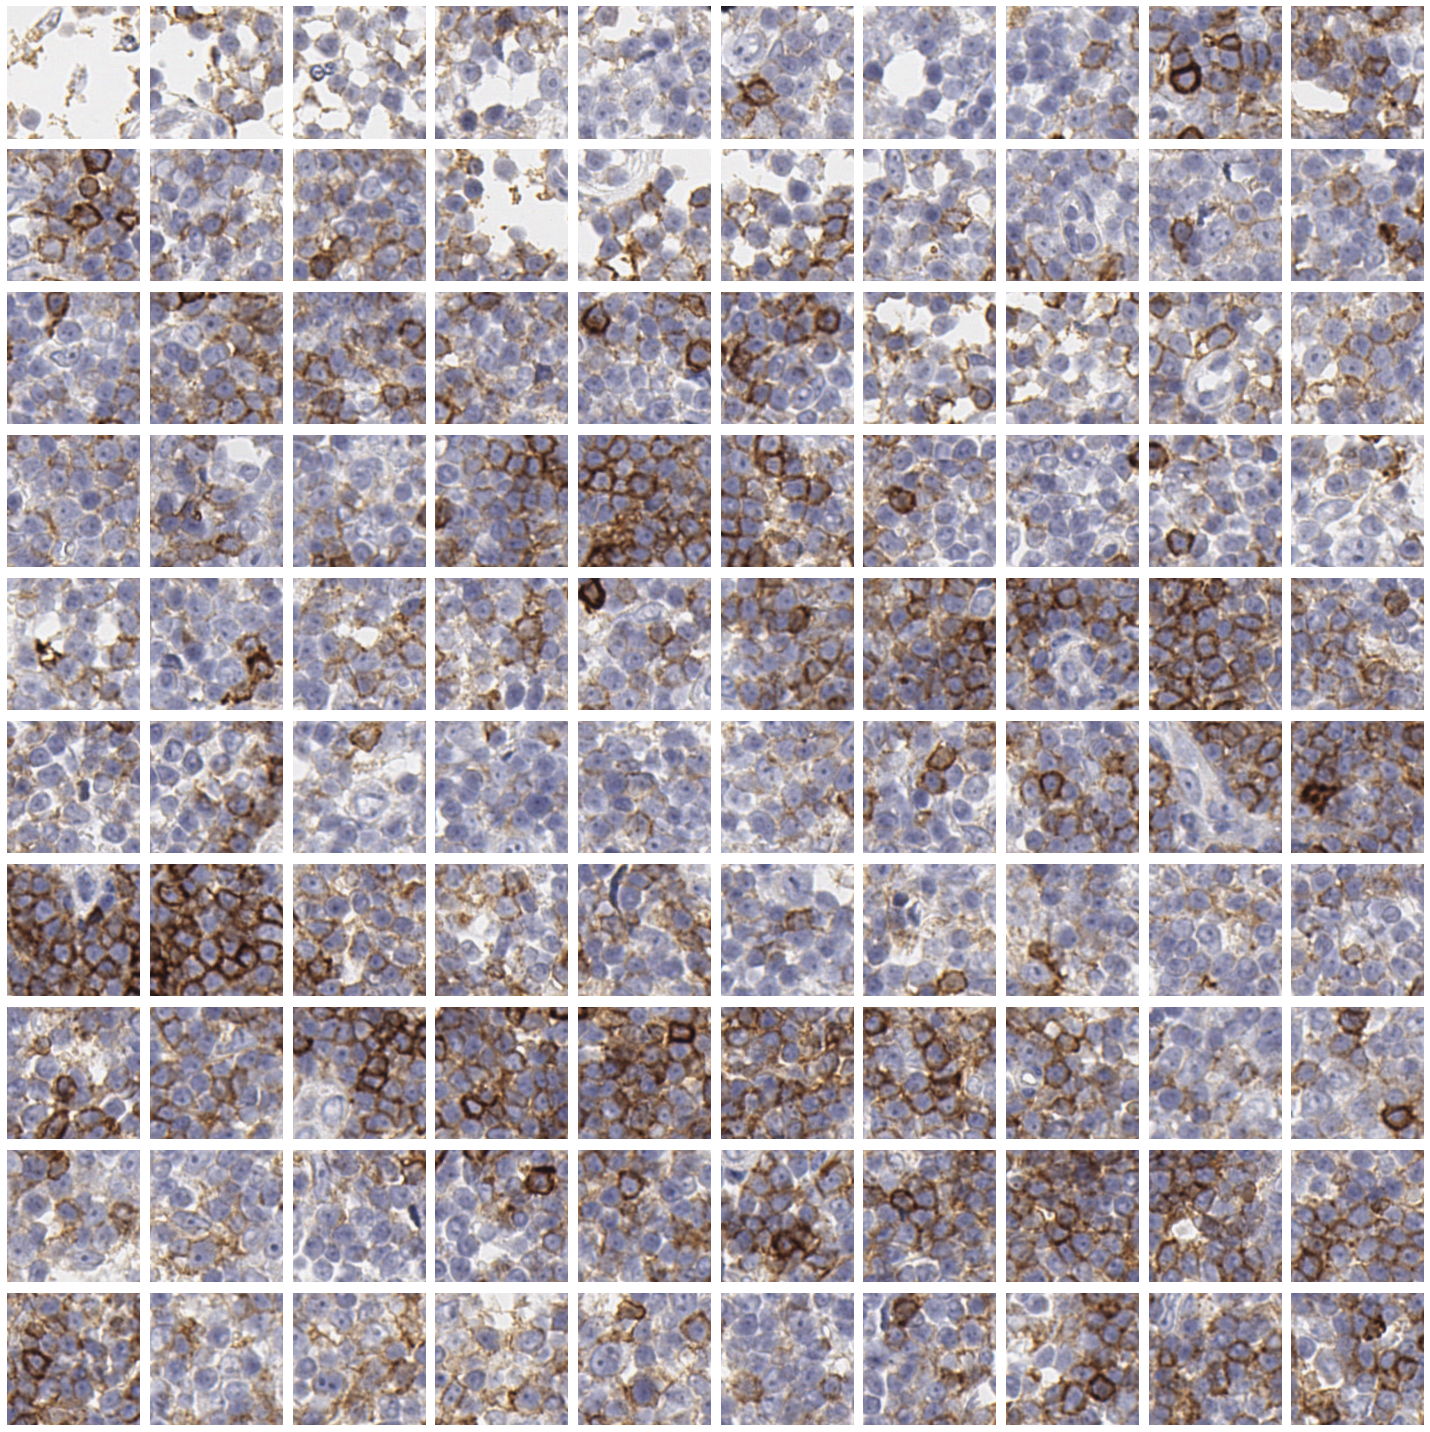

In [53]:
# Plot first 100 images
fig, axes = plt.subplots(10,10, figsize = (20,20))
ax = axes.ravel()
for i, axis in enumerate(ax):
    axis.imshow(reshaped_patches[i])
    axis.axis('off')
fig.tight_layout()

Text(0.5, 1.0, 'Reconstructed')

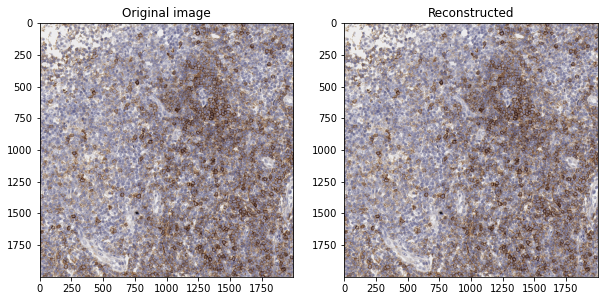

In [26]:
# fig, axes = plt.subplots(1,2, figsize = (10,20))
# ax = axes.ravel()
# ax[0].imshow(orig_img)
# ax[0].set_title('Original image')
# ax[1].imshow(reconstructed.astype(np.int64))
# ax[1].set_title('Reconstructed')